# Lab Assignment 1: Exploring Table Data

By Nick Chao & Carter Koehler

### 1. Business Understanding

...
...

Dataset: Intel CPUs URL: ""
Question of Interest: Which is the next Processor to End Interactive Support?

### 2. Data Understanding

2.1 Data Description

In [203]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
import sys

%matplotlib inline

from matplotlib import rcParams

rcParams['figure.figsize'] = 8,7

In [156]:
data_dir = os.path.join(os.getcwd(), "..", "data")

cpu_data = pd.read_csv(os.path.join(data_dir, "Intel_CPUs.csv"))

# replace status names to numerical indicators
cpu_data.Status.replace(to_replace = ['Announced', 'Launched', 'End of Interactive Support', 'End of Life'],
                        value = range(1,5), inplace = True)

# replace launch_date to a measurable unit 
cpu_data.Launch_Date.replace(to_replace = ['Q1\'00', 'Q2\'00', 'Q3\'00', 'Q4\'00', 'Q1\'01', 'Q2\'01', 'Q3\'01', 'Q4\'01', 'Q1\'02', 'Q2\'02', 'Q3\'02', 'Q4\'02', 'Q1\'03', 'Q2\'03', 'Q3\'03', 'Q4\'03', 'Q1\'04', 'Q2\'04', 'Q3\'04', 'Q4\'04', 'Q1\'05', 'Q2\'05', 'Q3\'05', 'Q4\'05', 'Q1\'06', 'Q2\'06', 'Q3\'06', 'Q4\'06', 'Q1\'07', 'Q2\'07', 'Q3\'07', 'Q4\'07', 'Q1\'08', 'Q2\'08', 'Q3\'08', 'Q4\'08', 'Q1\'09', 'Q2\'09', 'Q3\'09', 'Q4\'09', 'Q1\'10', 'Q2\'10', 'Q3\'10', 'Q4\'10', 'Q1\'11', 'Q2\'11', 'Q3\'11', 'Q4\'11', 'Q1\'12', 'Q2\'12', 'Q3\'12', 'Q4\'12', 'Q1\'13', 'Q2\'13', 'Q3\'13', 'Q4\'13', 'Q1\'14', 'Q2\'14', 'Q3\'14', 'Q4\'14', 'Q1\'15', 'Q2\'15', 'Q3\'15', 'Q4\'15', 'Q1\'16', 'Q2\'16', 'Q3\'16', 'Q4\'16', 'Q1\'17', 'Q2\'17', 'Q3\'17', 'Q4\'17', 'Q1\'18', 'Q2\'18', 'Q3\'18', 'Q4\'18', 'Q1 \'15', '04\'16', 'Q1\'99', 'Q2\'99'],
                    value = [*np.arange(1,20,0.25), 15.75, 17.0, 0.0, 0.25], inplace = True)

cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 45 columns):
Product_Collection                          2283 non-null object
Vertical_Segment                            2283 non-null object
Processor_Number                            1934 non-null object
Status                                      2283 non-null int64
Launch_Date                                 1871 non-null float64
Lithography                                 2212 non-null object
Recommended_Customer_Price                  1301 non-null object
nb_of_Cores                                 2283 non-null int64
nb_of_Threads                               1427 non-null float64
Processor_Base_Frequency                    2265 non-null object
Max_Turbo_Frequency                         914 non-null object
Cache                                       2271 non-null object
Bus_Speed                                   1989 non-null object
TDP                                         2216 

In [157]:
# find the data summary
cpu_data.describe()

Status  Launch_Date  nb_of_Cores  nb_of_Threads  \
count  2283.000000  1871.000000  2283.000000    1427.000000   
mean      2.720105    13.124399     4.066579       8.728101   
std       0.771464     3.729452     6.329884       9.132518   
min       1.000000     0.000000     1.000000       1.000000   
25%       2.000000    11.000000     1.000000       4.000000   
50%       3.000000    14.000000     2.000000       4.000000   
75%       3.000000    16.000000     4.000000       8.000000   
max       4.000000    18.500000    72.000000      56.000000   

       Max_nb_of_Memory_Channels  Processor_Graphics_  Support_4k  \
count                1414.000000                  0.0         0.0   
mean                    2.615276                  NaN         NaN   
std                     1.470327                  NaN         NaN   
min                     1.000000                  NaN         NaN   
25%                     2.000000                  NaN         NaN   
50%                     2.000000                  NaN         NaN   
75%                     3.000000                  NaN         NaN   
max                    16.000000                  NaN         NaN   

       OpenGL_Support  Max_nb_of_PCI_Express_Lanes  
count             0.0                  1179.000000  
mean              NaN                    20.399491  
std               NaN                    12.868963  
min               NaN                     0.000000  
25%               NaN                    16.000000  
50%               NaN                    16.000000  
75%               NaN                    32.000000  
max               NaN                    48.000000

In [158]:
# find the data type
print(cpu_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 45 columns):
Product_Collection                          2283 non-null object
Vertical_Segment                            2283 non-null object
Processor_Number                            1934 non-null object
Status                                      2283 non-null int64
Launch_Date                                 1871 non-null float64
Lithography                                 2212 non-null object
Recommended_Customer_Price                  1301 non-null object
nb_of_Cores                                 2283 non-null int64
nb_of_Threads                               1427 non-null float64
Processor_Base_Frequency                    2265 non-null object
Max_Turbo_Frequency                         914 non-null object
Cache                                       2271 non-null object
Bus_Speed                                   1989 non-null object
TDP                                         2216 

In [159]:
data_features = ['Product_Collection', 'Vertical_Segment', 'Processor_Number', 'Recommended_Customer_Price', 'nb_of_Cores', 'nb_of_Threads', 'Processor_Base_Frequency', 'Cache', 'Bus_Speed', 'TDP', 'Embedded_Options_Available', 'Max_Memory_Size', 'Max_nb_of_Memory_Channels', 'Instruction_Set', 'Intel_Hyper_Threading_Technology_', 'Intel_64_', 'Execute_Disable_Bit', 'Status', 'Launch_Date']

# picking which features are going to be relevant to the analysis

cpu_df = cpu_data.filter(data_features)
cpu_df.dropna(axis=0, subset=['Processor_Number'], inplace=True)
cpu_df.index = cpu_df.Processor_Number

# dropping anything that doesn't have an identifier

cpu_df.drop('Processor_Number', inplace=True)
cpu_df

Product_Collection  \
Processor_Number                                                  
i7-7Y75               7th Generation Intel® Core™ i7 Processors   
i5-8250U              8th Generation Intel® Core™ i5 Processors   
i7-8550U              8th Generation Intel® Core™ i7 Processors   
i7-3820                        Intel® Core™ X-series Processors   
i5-7Y57               7th Generation Intel® Core™ i5 Processors   
3205U                     Intel® Celeron® Processor 3000 Series   
N2805                        Intel® Celeron® Processor N Series   
J1750                        Intel® Celeron® Processor J Series   
G1610                        Intel® Celeron® Processor G Series   
518                            Legacy Intel® Pentium® Processor   
2020M                     Intel® Pentium® Processor 2000 Series   
773                            Legacy Intel® Pentium® Processor   
3825U                     Intel® Pentium® Processor 3000 Series   
4405U                     Intel® Pentium® Processor 4000 Series   
N3710                        Intel® Pentium® Processor N Series   
C1000             Intel® Quark™ SE C1000 Microcontroller Series   
J2850                        Intel® Pentium® Processor J Series   
J2900                        Intel® Pentium® Processor J Series   
J3710                        Intel® Pentium® Processor J Series   
J4205                        Intel® Pentium® Processor J Series   
N3700                        Intel® Pentium® Processor N Series   
N3510                        Intel® Pentium® Processor N Series   
N3520                        Intel® Pentium® Processor N Series   
N3530                        Intel® Pentium® Processor N Series   
N3540                        Intel® Pentium® Processor N Series   
N4200                        Intel® Pentium® Processor N Series   
4405Y                     Intel® Pentium® Processor 4000 Series   
4415Y                     Intel® Pentium® Processor 4000 Series   
4410Y                     Intel® Pentium® Processor 4000 Series   
4415U                     Intel® Pentium® Processor 4000 Series   
...                                                         ...   
i5-6440EQ             6th Generation Intel® Core™ i5 Processors   
i5-6400T              6th Generation Intel® Core™ i5 Processors   
i5-6400               6th Generation Intel® Core™ i5 Processors   
i5-6402P              6th Generation Intel® Core™ i5 Processors   
i5-6500TE             6th Generation Intel® Core™ i5 Processors   
i5-6500T              6th Generation Intel® Core™ i5 Processors   
i5-6500               6th Generation Intel® Core™ i5 Processors   
i5-6585R              6th Generation Intel® Core™ i5 Processors   
i5-6600T              6th Generation Intel® Core™ i5 Processors   
i5-6600K              6th Generation Intel® Core™ i5 Processors   
i5-6685R              6th Generation Intel® Core™ i5 Processors   
i5-6600               6th Generation Intel® Core™ i5 Processors   
i3-6006U              6th Generation Intel® Core™ i3 Processors   
i3-6100TE             6th Generation Intel® Core™ i3 Processors   
i3-6100T              6th Generation Intel® Core™ i3 Processors   
i3-6100               6th Generation Intel® Core™ i3 Processors   
i3-6167U              6th Generation Intel® Core™ i3 Processors   
i3-6157U              6th Generation Intel® Core™ i3 Processors   
i3-6102E              6th Generation Intel® Core™ i3 Processors   
i3-6100U              6th Generation Intel® Core™ i3 Processors   
i3-6100H              6th Generation Intel® Core™ i3 Processors   
i3-6320               6th Generation Intel® Core™ i3 Processors   
i3-6300T              6th Generation Intel® Core™ i3 Processors   
i3-6100E              6th Generation Intel® Core™ i3 Processors   
i3-6300               6th Generation Intel® Core™ i3 Processors   
M5-6Y54                6th Generation Intel® Core™ m Processors   
M5-6Y57                6th Generation Intel® Core™ m Processors   
M7-6Y75                6t

In [160]:
# one-hot encoding Collection variable

cpu_df.Product_Collection.replace(
    to_replace=['.*Core.*', '.*X-series.*', '.*Celeron.*', '.*Pentium.*', '.*Quark.*', '.*Core. [mM].*', '.*Atom.*', '.*Itanium.*', '.*Xeon.*'], 
    value=['Core', 'X-series', 'Celeron', 'Pentium', 'Quark', 'm', 'Atom', 'Itanium', 'Xeon'], regex=True, inplace=True)

# cpu_df = pd.concat([cpu_df, pd.get_dummies(cpu_df.Product_Collection)], axis=1)
cpu_df.drop(['Processor_Number'],  axis=1, inplace=True)
cpu_df

Product_Collection Vertical_Segment  \
Processor_Number                                       
i7-7Y75                        Core           Mobile   
i5-8250U                       Core           Mobile   
i7-8550U                       Core           Mobile   
i7-3820                        Core          Desktop   
i5-7Y57                        Core           Mobile   
3205U                       Celeron           Mobile   
N2805                       Celeron           Mobile   
J1750                       Celeron          Desktop   
G1610                       Celeron          Desktop   
518                         Pentium           Mobile   
2020M                       Pentium           Mobile   
773                         Pentium           Mobile   
3825U                       Pentium           Mobile   
4405U                       Pentium           Mobile   
N3710                       Pentium           Mobile   
C1000                         Quark         Embedded   
J2850                       Pentium          Desktop   
J2900                       Pentium          Desktop   
J3710                       Pentium          Desktop   
J4205                       Pentium          Desktop   
N3700                       Pentium           Mobile   
N3510                       Pentium           Mobile   
N3520                       Pentium           Mobile   
N3530                       Pentium           Mobile   
N3540                       Pentium           Mobile   
N4200                       Pentium           Mobile   
4405Y                       Pentium           Mobile   
4415Y                       Pentium           Mobile   
4410Y                       Pentium           Mobile   
4415U                       Pentium           Mobile   
...                             ...              ...   
i5-6440EQ                      Core         Embedded   
i5-6400T                       Core          Desktop   
i5-6400                        Core          Desktop   
i5-6402P                       Core          Desktop   
i5-6500TE                      Core         Embedded   
i5-6500T                       Core          Desktop   
i5-6500                        Core          Desktop   
i5-6585R                       Core          Desktop   
i5-6600T                       Core          Desktop   
i5-6600K                       Core          Desktop   
i5-6685R                       Core          Desktop   
i5-6600                        Core          Desktop   
i3-6006U                       Core           Mobile   
i3-6100TE                      Core         Embedded   
i3-6100T                       Core          Desktop   
i3-6100                        Core          Desktop   
i3-6167U                       Core           Mobile   
i3-6157U                       Core           Mobile   
i3-6102E                       Core         Embedded   
i3-6100U                       Core           Mobile   
i3-6100H                       Core           Mobile   
i3-6320                        Core          Desktop   
i3-6300T                       Core          Desktop   
i3-6100E                       Core         Embedded   
i3-6300                        Core          Desktop   
M5-6Y54                        Core           Mobile   
M5-6Y57                        Core           Mobile   
M7-6Y75                        Core           Mobile   
i7-5550U                       Core           Mobile   
i7-5557U                       Core           Mobile   

                 Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
Processor_Number                                                          
i7-7Y75                            $393.00             2            4.0   
i5-8250U                           $297.00             4            8.0   
i7-8550U                           $409.00             4            8.0   
i7-3820                            $305.00             4            8.0   
i5-7Y57                            $28

In [161]:
# encoding categorical variables as binary

cpu_df.replace(['Yes', 'No'], [1,0], inplace=True)
cpu_df

Product_Collection Vertical_Segment  \
Processor_Number                                       
i7-7Y75                        Core           Mobile   
i5-8250U                       Core           Mobile   
i7-8550U                       Core           Mobile   
i7-3820                        Core          Desktop   
i5-7Y57                        Core           Mobile   
3205U                       Celeron           Mobile   
N2805                       Celeron           Mobile   
J1750                       Celeron          Desktop   
G1610                       Celeron          Desktop   
518                         Pentium           Mobile   
2020M                       Pentium           Mobile   
773                         Pentium           Mobile   
3825U                       Pentium           Mobile   
4405U                       Pentium           Mobile   
N3710                       Pentium           Mobile   
C1000                         Quark         Embedded   
J2850                       Pentium          Desktop   
J2900                       Pentium          Desktop   
J3710                       Pentium          Desktop   
J4205                       Pentium          Desktop   
N3700                       Pentium           Mobile   
N3510                       Pentium           Mobile   
N3520                       Pentium           Mobile   
N3530                       Pentium           Mobile   
N3540                       Pentium           Mobile   
N4200                       Pentium           Mobile   
4405Y                       Pentium           Mobile   
4415Y                       Pentium           Mobile   
4410Y                       Pentium           Mobile   
4415U                       Pentium           Mobile   
...                             ...              ...   
i5-6440EQ                      Core         Embedded   
i5-6400T                       Core          Desktop   
i5-6400                        Core          Desktop   
i5-6402P                       Core          Desktop   
i5-6500TE                      Core         Embedded   
i5-6500T                       Core          Desktop   
i5-6500                        Core          Desktop   
i5-6585R                       Core          Desktop   
i5-6600T                       Core          Desktop   
i5-6600K                       Core          Desktop   
i5-6685R                       Core          Desktop   
i5-6600                        Core          Desktop   
i3-6006U                       Core           Mobile   
i3-6100TE                      Core         Embedded   
i3-6100T                       Core          Desktop   
i3-6100                        Core          Desktop   
i3-6167U                       Core           Mobile   
i3-6157U                       Core           Mobile   
i3-6102E                       Core         Embedded   
i3-6100U                       Core           Mobile   
i3-6100H                       Core           Mobile   
i3-6320                        Core          Desktop   
i3-6300T                       Core          Desktop   
i3-6100E                       Core         Embedded   
i3-6300                        Core          Desktop   
M5-6Y54                        Core           Mobile   
M5-6Y57                        Core           Mobile   
M7-6Y75                        Core           Mobile   
i7-5550U                       Core           Mobile   
i7-5557U                       Core           Mobile   

                 Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
Processor_Number                                                          
i7-7Y75                            $393.00             2            4.0   
i5-8250U                           $297.00             4            8.0   
i7-8550U                           $409.00             4            8.0   
i7-3820                            $305.00             4            8.0   
i5-7Y57                            $28

In [162]:
# cleaning up the price variable

def process_price(raw_price):
    if isinstance(raw_price, float):
        return raw_price
    elif '-' in raw_price:
        split_price = [float(price.strip(' ').strip('$').replace(',', '')) for price in raw_price.split('-')]
        return np.mean(split_price)
    else:
        return float(raw_price.strip('$').replace(',',''))

for entry in cpu_df.Recommended_Customer_Price:
    entry = process_price(entry)
    
cpu_df['Recommended_Customer_Price'] = cpu_df['Recommended_Customer_Price'].apply(process_price)

cpu_df

Product_Collection Vertical_Segment  \
Processor_Number                                       
i7-7Y75                        Core           Mobile   
i5-8250U                       Core           Mobile   
i7-8550U                       Core           Mobile   
i7-3820                        Core          Desktop   
i5-7Y57                        Core           Mobile   
3205U                       Celeron           Mobile   
N2805                       Celeron           Mobile   
J1750                       Celeron          Desktop   
G1610                       Celeron          Desktop   
518                         Pentium           Mobile   
2020M                       Pentium           Mobile   
773                         Pentium           Mobile   
3825U                       Pentium           Mobile   
4405U                       Pentium           Mobile   
N3710                       Pentium           Mobile   
C1000                         Quark         Embedded   
J2850                       Pentium          Desktop   
J2900                       Pentium          Desktop   
J3710                       Pentium          Desktop   
J4205                       Pentium          Desktop   
N3700                       Pentium           Mobile   
N3510                       Pentium           Mobile   
N3520                       Pentium           Mobile   
N3530                       Pentium           Mobile   
N3540                       Pentium           Mobile   
N4200                       Pentium           Mobile   
4405Y                       Pentium           Mobile   
4415Y                       Pentium           Mobile   
4410Y                       Pentium           Mobile   
4415U                       Pentium           Mobile   
...                             ...              ...   
i5-6440EQ                      Core         Embedded   
i5-6400T                       Core          Desktop   
i5-6400                        Core          Desktop   
i5-6402P                       Core          Desktop   
i5-6500TE                      Core         Embedded   
i5-6500T                       Core          Desktop   
i5-6500                        Core          Desktop   
i5-6585R                       Core          Desktop   
i5-6600T                       Core          Desktop   
i5-6600K                       Core          Desktop   
i5-6685R                       Core          Desktop   
i5-6600                        Core          Desktop   
i3-6006U                       Core           Mobile   
i3-6100TE                      Core         Embedded   
i3-6100T                       Core          Desktop   
i3-6100                        Core          Desktop   
i3-6167U                       Core           Mobile   
i3-6157U                       Core           Mobile   
i3-6102E                       Core         Embedded   
i3-6100U                       Core           Mobile   
i3-6100H                       Core           Mobile   
i3-6320                        Core          Desktop   
i3-6300T                       Core          Desktop   
i3-6100E                       Core         Embedded   
i3-6300                        Core          Desktop   
M5-6Y54                        Core           Mobile   
M5-6Y57                        Core           Mobile   
M7-6Y75                        Core           Mobile   
i7-5550U                       Core           Mobile   
i7-5557U                       Core           Mobile   

                  Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
Processor_Number                                                           
i7-7Y75                               393.00            2            4.0   
i5-8250U                              297.00            4            8.0   
i7-8550U                              409.00            4            8.0   
i7-3820                               305.00            4            8.0   
i5-7Y57                         

In [163]:
import re

def get_numbers(word):
    if isinstance(word, str):
        return float(re.findall('[\d]*[.]?[\d]+?', word)[0])
    else:
        return word

for column in ['Cache', 'Bus_Speed', 'TDP', 'Max_Memory_Size']:
    cpu_df[column] = cpu_df[column].apply(get_numbers)
    
cpu_df

Product_Collection Vertical_Segment  \
Processor_Number                                       
i7-7Y75                        Core           Mobile   
i5-8250U                       Core           Mobile   
i7-8550U                       Core           Mobile   
i7-3820                        Core          Desktop   
i5-7Y57                        Core           Mobile   
3205U                       Celeron           Mobile   
N2805                       Celeron           Mobile   
J1750                       Celeron          Desktop   
G1610                       Celeron          Desktop   
518                         Pentium           Mobile   
2020M                       Pentium           Mobile   
773                         Pentium           Mobile   
3825U                       Pentium           Mobile   
4405U                       Pentium           Mobile   
N3710                       Pentium           Mobile   
C1000                         Quark         Embedded   
J2850                       Pentium          Desktop   
J2900                       Pentium          Desktop   
J3710                       Pentium          Desktop   
J4205                       Pentium          Desktop   
N3700                       Pentium           Mobile   
N3510                       Pentium           Mobile   
N3520                       Pentium           Mobile   
N3530                       Pentium           Mobile   
N3540                       Pentium           Mobile   
N4200                       Pentium           Mobile   
4405Y                       Pentium           Mobile   
4415Y                       Pentium           Mobile   
4410Y                       Pentium           Mobile   
4415U                       Pentium           Mobile   
...                             ...              ...   
i5-6440EQ                      Core         Embedded   
i5-6400T                       Core          Desktop   
i5-6400                        Core          Desktop   
i5-6402P                       Core          Desktop   
i5-6500TE                      Core         Embedded   
i5-6500T                       Core          Desktop   
i5-6500                        Core          Desktop   
i5-6585R                       Core          Desktop   
i5-6600T                       Core          Desktop   
i5-6600K                       Core          Desktop   
i5-6685R                       Core          Desktop   
i5-6600                        Core          Desktop   
i3-6006U                       Core           Mobile   
i3-6100TE                      Core         Embedded   
i3-6100T                       Core          Desktop   
i3-6100                        Core          Desktop   
i3-6167U                       Core           Mobile   
i3-6157U                       Core           Mobile   
i3-6102E                       Core         Embedded   
i3-6100U                       Core           Mobile   
i3-6100H                       Core           Mobile   
i3-6320                        Core          Desktop   
i3-6300T                       Core          Desktop   
i3-6100E                       Core         Embedded   
i3-6300                        Core          Desktop   
M5-6Y54                        Core           Mobile   
M5-6Y57                        Core           Mobile   
M7-6Y75                        Core           Mobile   
i7-5550U                       Core           Mobile   
i7-5557U                       Core           Mobile   

                  Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
Processor_Number                                                           
i7-7Y75                               393.00            2            4.0   
i5-8250U                              297.00            4            8.0   
i7-8550U                              409.00            4            8.0   
i7-3820                               305.00            4            8.0   
i5-7Y57                         

In [167]:
def convert_clock_speed(speed):
    if isinstance(speed, float):
        return speed
    elif 'M' in speed:
        factor = 1
    elif 'G' in speed:
        factor = 1000
        
    return factor * get_numbers(speed)

cpu_df.Processor_Base_Frequency = cpu_df.Processor_Base_Frequency.apply(convert_clock_speed)

In [168]:
default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 99

display(cpu_df)

pd.options.display.max_columns = default_columns

Product_Collection Vertical_Segment  \
Processor_Number                                       
i7-7Y75                        Core           Mobile   
i5-8250U                       Core           Mobile   
i7-8550U                       Core           Mobile   
i7-3820                        Core          Desktop   
i5-7Y57                        Core           Mobile   
3205U                       Celeron           Mobile   
N2805                       Celeron           Mobile   
J1750                       Celeron          Desktop   
G1610                       Celeron          Desktop   
518                         Pentium           Mobile   
2020M                       Pentium           Mobile   
773                         Pentium           Mobile   
3825U                       Pentium           Mobile   
4405U                       Pentium           Mobile   
N3710                       Pentium           Mobile   
C1000                         Quark         Embedded   
J2850                       Pentium          Desktop   
J2900                       Pentium          Desktop   
J3710                       Pentium          Desktop   
J4205                       Pentium          Desktop   
N3700                       Pentium           Mobile   
N3510                       Pentium           Mobile   
N3520                       Pentium           Mobile   
N3530                       Pentium           Mobile   
N3540                       Pentium           Mobile   
N4200                       Pentium           Mobile   
4405Y                       Pentium           Mobile   
4415Y                       Pentium           Mobile   
4410Y                       Pentium           Mobile   
4415U                       Pentium           Mobile   
...                             ...              ...   
i5-6440EQ                      Core         Embedded   
i5-6400T                       Core          Desktop   
i5-6400                        Core          Desktop   
i5-6402P                       Core          Desktop   
i5-6500TE                      Core         Embedded   
i5-6500T                       Core          Desktop   
i5-6500                        Core          Desktop   
i5-6585R                       Core          Desktop   
i5-6600T                       Core          Desktop   
i5-6600K                       Core          Desktop   
i5-6685R                       Core          Desktop   
i5-6600                        Core          Desktop   
i3-6006U                       Core           Mobile   
i3-6100TE                      Core         Embedded   
i3-6100T                       Core          Desktop   
i3-6100                        Core          Desktop   
i3-6167U                       Core           Mobile   
i3-6157U                       Core           Mobile   
i3-6102E                       Core         Embedded   
i3-6100U                       Core           Mobile   
i3-6100H                       Core           Mobile   
i3-6320                        Core          Desktop   
i3-6300T                       Core          Desktop   
i3-6100E                       Core         Embedded   
i3-6300                        Core          Desktop   
M5-6Y54                        Core           Mobile   
M5-6Y57                        Core           Mobile   
M7-6Y75                        Core           Mobile   
i7-5550U                       Core           Mobile   
i7-5557U                       Core           Mobile   

                  Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
Processor_Number                                                           
i7-7Y75                               393.00            2            4.0   
i5-8250U                              297.00            4            8.0   
i7-8550U                              409.00            4            8.0   
i7-3820                               305.00            4            8.0   
i5-7Y57                         

# Missing Values

In [169]:
cpu_df.info()

cpu_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1934 entries, i7-7Y75 to i7-5557U
Data columns (total 18 columns):
Product_Collection                   1934 non-null object
Vertical_Segment                     1934 non-null object
Recommended_Customer_Price           1291 non-null float64
nb_of_Cores                          1934 non-null int64
nb_of_Threads                        1427 non-null float64
Processor_Base_Frequency             1916 non-null float64
Cache                                1932 non-null float64
Bus_Speed                            1641 non-null float64
TDP                                  1886 non-null float64
Embedded_Options_Available           1933 non-null float64
Max_Memory_Size                      1403 non-null float64
Max_nb_of_Memory_Channels            1414 non-null float64
Instruction_Set                      1842 non-null object
Intel_Hyper_Threading_Technology_    1846 non-null float64
Intel_64_                            1834 non-null float64
Execute_

Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
count                 1291.000000  1934.000000    1427.000000   
mean                   841.621890     4.617373       8.728101   
std                   1443.550711     6.731525       9.132518   
min                      2.540000     1.000000       1.000000   
25%                    161.000000     2.000000       4.000000   
50%                    299.500000     2.000000       4.000000   
75%                    685.500000     4.000000       8.000000   
max                  13011.000000    72.000000      56.000000   

       Processor_Base_Frequency        Cache    Bus_Speed          TDP  \
count               1916.000000  1932.000000  1641.000000  1886.000000   
mean                2341.611169    29.300673   263.878245    62.541676   
std                  713.552618    95.801303   439.418881    46.277893   
min                   32.000000     1.000000     0.000000     0.000000   
25%                 1800.000000     3.000000     5.000000    28.000000   
50%                 2300.000000     6.000000     6.400000    51.000000   
75%                 2900.000000    12.000000   533.000000    89.500000   
max                 4300.000000   512.000000  2500.000000   300.000000   

       Embedded_Options_Available  Max_Memory_Size  Max_nb_of_Memory_Channels  \
count                 1933.000000      1403.000000                1414.000000   
mean                     0.220900       122.271133                   2.615276   
std                      0.414961       222.053943                   1.470327   
min                      0.000000         1.000000                   1.000000   
25%                      0.000000        16.000000                   2.000000   
50%                      0.000000        32.000000                   2.000000   
75%                      0.000000        64.000000                   3.000000   
max                      1.000000       768.000000                  16.000000   

       Intel_Hyper_Threading_Technology_    Intel_64_  Execute_Disable_Bit  \
count                        1846.000000  1834.000000          1846.000000   
mean                            0.579632     0.920938             0.973456   
std                             0.493752     0.269909             0.160790   
min                             0.000000     0.000000             0.000000   
25%                             0.000000     1.000000             1.000000   
50%                             1.000000     1.000000             1.000000   
75%                             1.000000     1.000000             1.000000   
max                             1.000000     1.000000             1.000000   

            Status  Launch_Date  
count  1934.000000  1811.000000  
mean      2.659772    13.440502  
std       0.811241     3.335035  
min       1.000000     4.250000  
25%       2.000000    11.000000  
50%       2.000000    14.250000  
75%       3.000000    16.000000  
max       4.000000    18.500000

In [170]:
cpu_grp = cpu_df.groupby(by=['Product_Collection'])

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 2000

display(cpu_grp.describe())

pd.options.display.max_columns = default_columns

Bus_Speed                                                  \
                       count        mean         std  min  25%    50%    75%   
Product_Collection                                                             
Atom                    45.0  649.822222  899.037239  2.5  2.5  400.0  533.0   
Celeron                170.0  308.970588  306.898200  0.0  5.0  400.0  533.0   
Core                   667.0  213.724438  407.614246  0.0  5.0    5.0    8.0   
Itanium                 27.0  299.007407  291.345835  4.8  6.4  533.0  533.0   
Pentium                212.0  385.143868  367.279681  0.0  5.0  400.0  800.0   
Quark                    0.0         NaN         NaN  NaN  NaN    NaN    NaN   
Xeon                   520.0  228.806346  463.177122  0.0  5.8    8.0    9.6   

                            Cache                                           \
                       max  count        mean         std  min   25%   50%   
Product_Collection                                                           
Atom                2500.0  142.0  157.260563  234.642045  1.0   1.0   2.0   
Celeron              800.0  208.0   91.086538  171.291118  1.0   1.0   2.0   
Core                1600.0  691.0    5.003329    2.908982  1.0   3.0   4.0   
Itanium              667.0   27.0   19.481481    7.717963  6.0  12.0  20.0   
Pentium             1066.0  233.0    2.223176    0.983473  1.0   2.0   2.0   
Quark                  NaN    9.0   15.111111    2.666667  8.0  16.0  16.0   
Xeon                1600.0  622.0   17.193891   11.688009  2.0   8.0  12.0   

                                 Embedded_Options_Available            \
                      75%    max                      count      mean   
Product_Collection                                                      
Atom                512.0  512.0                      142.0  0.415493   
Celeron               2.0  512.0                      208.0  0.283654   
Core                  6.0   25.0                      690.0  0.171014   
Itanium              24.0   32.0                       27.0  0.000000   
Pentium               3.0    6.0                      233.0  0.188841   
Quark                16.0   16.0                       11.0  1.000000   
Xeon                 24.7   60.0                      622.0  0.218650   

                                                      Execute_Disable_Bit  \
                         std  min  25%  50%  75%  max               count   
Product_Collection                                                          
Atom                0.494551  0.0  0.0  0.0  1.0  1.0                90.0   
Celeron             0.451858  0.0  0.0  0.0  1.0  1.0               196.0   
Core                0.376795  0.0  0.0  0.0  0.0  1.0               682.0   
Itanium             0.000000  0.0  0.0  0.0  0.0  0.0                27.0   
Pentium             0.392225  0.0  0.0  0.0  0.0  1.0               231.0   
Quark               0.000000  1.0  1.0  1.0  1.0  1.0                 8.0   
Xeon                0.413663  0.0  0.0  0.0  0.0  1.0               612.0   

                                                                Intel_64_  \
                        mean       std  min  25%  50%  75%  max     count   
Product_Collection                                                          
Atom                1.000000  0.000000  1.0  1.0  1.0  1.0  1.0      96.0   
Celeron             0.918367  0.274505  0.0  1.0  1.0  1.0  1.0     200.0   
Core                0.998534  0.038292  0.0  1.0  1.0  1.0  1.0     687.0   
Itanium             0.481481  0.509175  0.0  0.0  0.0  1.0  1.0      14.0   
Pentium             0.922078  0.268631  0.0  1.0  1.0  1.0  1.0     223.0   
Quark               1.000000  0.000000  1.0  1.0  1.0  1.0  1.0       8.0   
Xeon                1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     606.0   

                                                                 \
                        mean       std  min  25%  50%  75%  max   
Product_Collection            

In [171]:
# cpu_df = cpu_df[cpu_df.Product_Collection != 'Itanium']
# cpu_df = cpu_df[(cpu_df.nb_of_Cores < 50) & (cpu_df.nb_of_Cores > 1)]
# cpu_df = cpu_df[(cpu_df.nb_of_Cores < 10) | (cpu_df.Product_Collection != 'Core')]

cpu_grp = cpu_df.groupby(by=['Product_Collection', 'nb_of_Cores'])

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 2000

display(cpu_grp.describe())

pd.options.display.max_columns = default_columns

Bus_Speed                                 \
                                   count        mean         std    min   
Product_Collection nb_of_Cores                                            
Atom               1                36.0  796.916667  947.462932    2.5   
                   2                 9.0   61.444444  176.833333    2.5   
                   4                 0.0         NaN         NaN    NaN   
                   8                 0.0         NaN         NaN    NaN   
                   12                0.0         NaN         NaN    NaN   
                   16                0.0         NaN         NaN    NaN   
Celeron            1                85.0  485.047059  206.341367    0.0   
                   2                85.0  132.894118  290.126708    2.5   
                   4                 0.0         NaN         NaN    NaN   
Core               1                12.0  622.083333  118.532280  533.0   
                   2               397.0  253.147355  413.149047    2.5   
                   4               239.0  144.294142  401.217987    2.5   
                   6                12.0    4.616667    2.359443    0.0   
                   8                 2.0    4.000000    5.656854    0.0   
                   10                1.0    8.000000         NaN    8.0   
                   12                1.0    8.000000         NaN    8.0   
                   14                1.0    8.000000         NaN    8.0   
                   16                1.0    8.000000         NaN    8.0   
                   18                1.0    8.000000         NaN    8.0   
Itanium            1                 1.0  533.000000         NaN  533.0   
                   2                14.0  533.557143  164.273434    4.8   
                   4                 8.0    5.600000    0.855236    4.8   
                   8                 4.0    6.400000    0.000000    6.4   
Pentium            1                71.0  617.732394  169.069804  400.0   
                   2               141.0  268.024823  384.399282    0.0   
                   4                 0.0         NaN         NaN    NaN   
Quark              1                 0.0         NaN         NaN    NaN   
Xeon               1                 2.0  534.250000  752.008062    2.5   
                   2                60.0  862.836667  456.496590    2.5   
                   4               211.0  289.902370  531.434836    0.0   
                   6                67.0   53.197015  220.948395    0.0   
                   8                59.0    6.735593    2.441718    0.0   
                   10               45.0    7.448889    1.514269    0.0   
                   12               23.0    8.591304    0.940944    7.2   
                   14               14.0    9.257143    0.681305    8.0   
                   15               10.0    8.000000    0.000000    8.0   
                   16                8.0    9.400000    0.565685    8.0   
                   18               12.0    8.800000    2.771281    0.0   
                   20                2.0    9.600000    0.000000    9.6   
                   22                5.0    9.600000    0.000000    9.6   
                   24                2.0    9.600000    0.000000    9.6   
                   26                0.0         NaN         NaN    NaN   
                   28                0.0         NaN         NaN    NaN   
                   57                0.0         NaN         NaN    NaN   
                   60                0.0         NaN         NaN    NaN   
                   61                0.0         NaN         NaN    NaN   
                   64                0.0         NaN         NaN    NaN   
                   68                0.0         NaN         NaN    NaN   
                   72                0.0         NaN         NaN    NaN   

                                                                    Cache  \
                                    25%      50%     

In [172]:
fill_fn = lambda group : group.fillna(group.median())

cpu_impute = cpu_grp.transform(fill_fn)

# fill any deleted columns
col_deleted = list( set(cpu_df.columns) - set(cpu_impute.columns)) # in case the median operation deleted columns
cpu_impute[col_deleted] = cpu_df[col_deleted]

cpu_clean = cpu_impute.dropna()
cpu_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1623 entries, i7-7Y75 to i7-5557U
Data columns (total 18 columns):
Recommended_Customer_Price           1623 non-null float64
nb_of_Threads                        1623 non-null float64
Processor_Base_Frequency             1623 non-null float64
Cache                                1623 non-null float64
Bus_Speed                            1623 non-null float64
TDP                                  1623 non-null float64
Embedded_Options_Available           1623 non-null float64
Max_Memory_Size                      1623 non-null float64
Max_nb_of_Memory_Channels            1623 non-null float64
Intel_Hyper_Threading_Technology_    1623 non-null float64
Intel_64_                            1623 non-null float64
Execute_Disable_Bit                  1623 non-null float64
Status                               1623 non-null int64
Launch_Date                          1623 non-null float64
nb_of_Cores                          1623 non-null int64
Vertica

/usr/lib64/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


count         1623
unique           4
top       consumer
freq          1194
Name: Recommended_Customer_Price, dtype: object

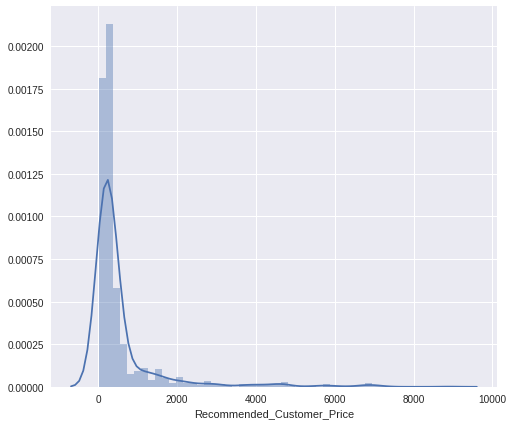

In [173]:
# discretizing price variable

sns.distplot(cpu_clean.Recommended_Customer_Price)

cpu_clean.Recommended_Customer_Price = pd.cut(cpu_clean.Recommended_Customer_Price, [0,400,800,1500,1e9], labels=['consumer', 'consumer_expensive', 'industry', 'extremely_expensive'])

cpu_clean.Recommended_Customer_Price.describe()

In [176]:
# one-hot encoding categorical variables

# cpu_clean.Product_Collection.replace(
#     to_replace=['.*Core.*', '.*X-series.*', '.*Celeron.*', '.*Pentium.*', '.*Quark.*', '.*Core. [mM].*', '.*Atom.*', '.*Itanium.*', '.*Xeon.*'], 
#     value=['Core', 'X-series', 'Celeron', 'Pentium', 'Quark', 'm', 'Atom', 'Itanium', 'Xeon'], regex=True, inplace=True)

# cpu_one_hot = pd.concat([cpu_clean, pd.get_dummies(cpu_clean.Product_Collection), pd.get_dummies(cpu_clean.Vertical_Segment), pd.get_dummies(cpu_clean.Instruction_Set)], axis=1)
# cpu_one_hot.drop(['Product_Collection', 'Vertical_Segment', 'Instruction_Set'],  axis=1, inplace=True)
# cpu_one_hot

# Analysis on Data with Mixed Types

In [177]:
categ_features = [
    'Recommended_Customer_Price',
    'Embedded_Options_Available',
    'Execute_Disable_Bit',
    'Intel_Hyper_Threading_Technology_',
    'Intel_64_',
    'Status',
    'Desktop',
    'Embedded',
    'Mobile',
    'Server',
    'Collection',
    '32-bit',
    '64-bit',
    'Itanium 64-bit',
    'nb_of_Cores',
    'nb_of_Threads']

num_features = ['Launch_Date',
                'TDP',
               'Max_nb_of_Memory_Channels',
               'Max_Memory_Size',
               'Bus_Speed',
               'Cache',
               'Processor_Base_Frequency']

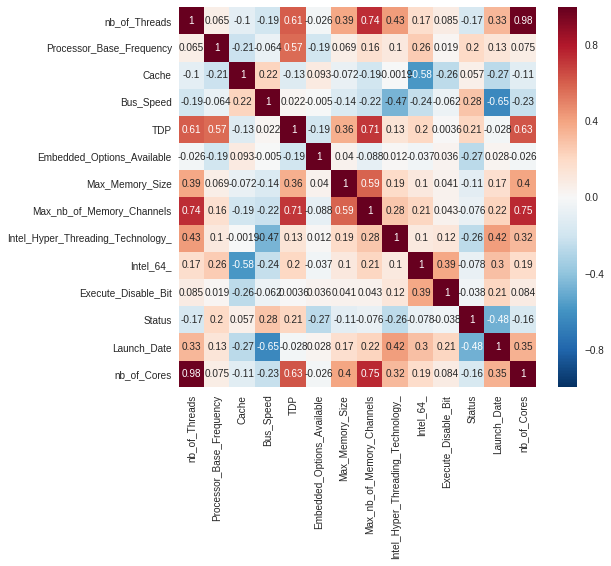

In [178]:
sns.heatmap(cpu_clean.corr(), annot=True)

Looking at the above heatmap, we see that number of Threads and Cores are, somewhat unsurprisingly, highly correlated and are also correlated with other features one would expect in a higher-end processor.

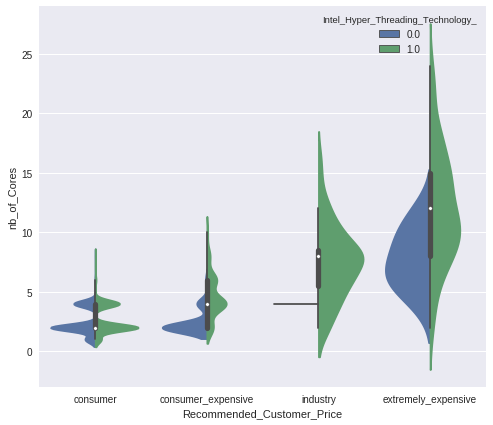

In [179]:
sns.violinplot(x='Recommended_Customer_Price', y='nb_of_Cores', hue='Intel_Hyper_Threading_Technology_', split=True, data=cpu_clean)

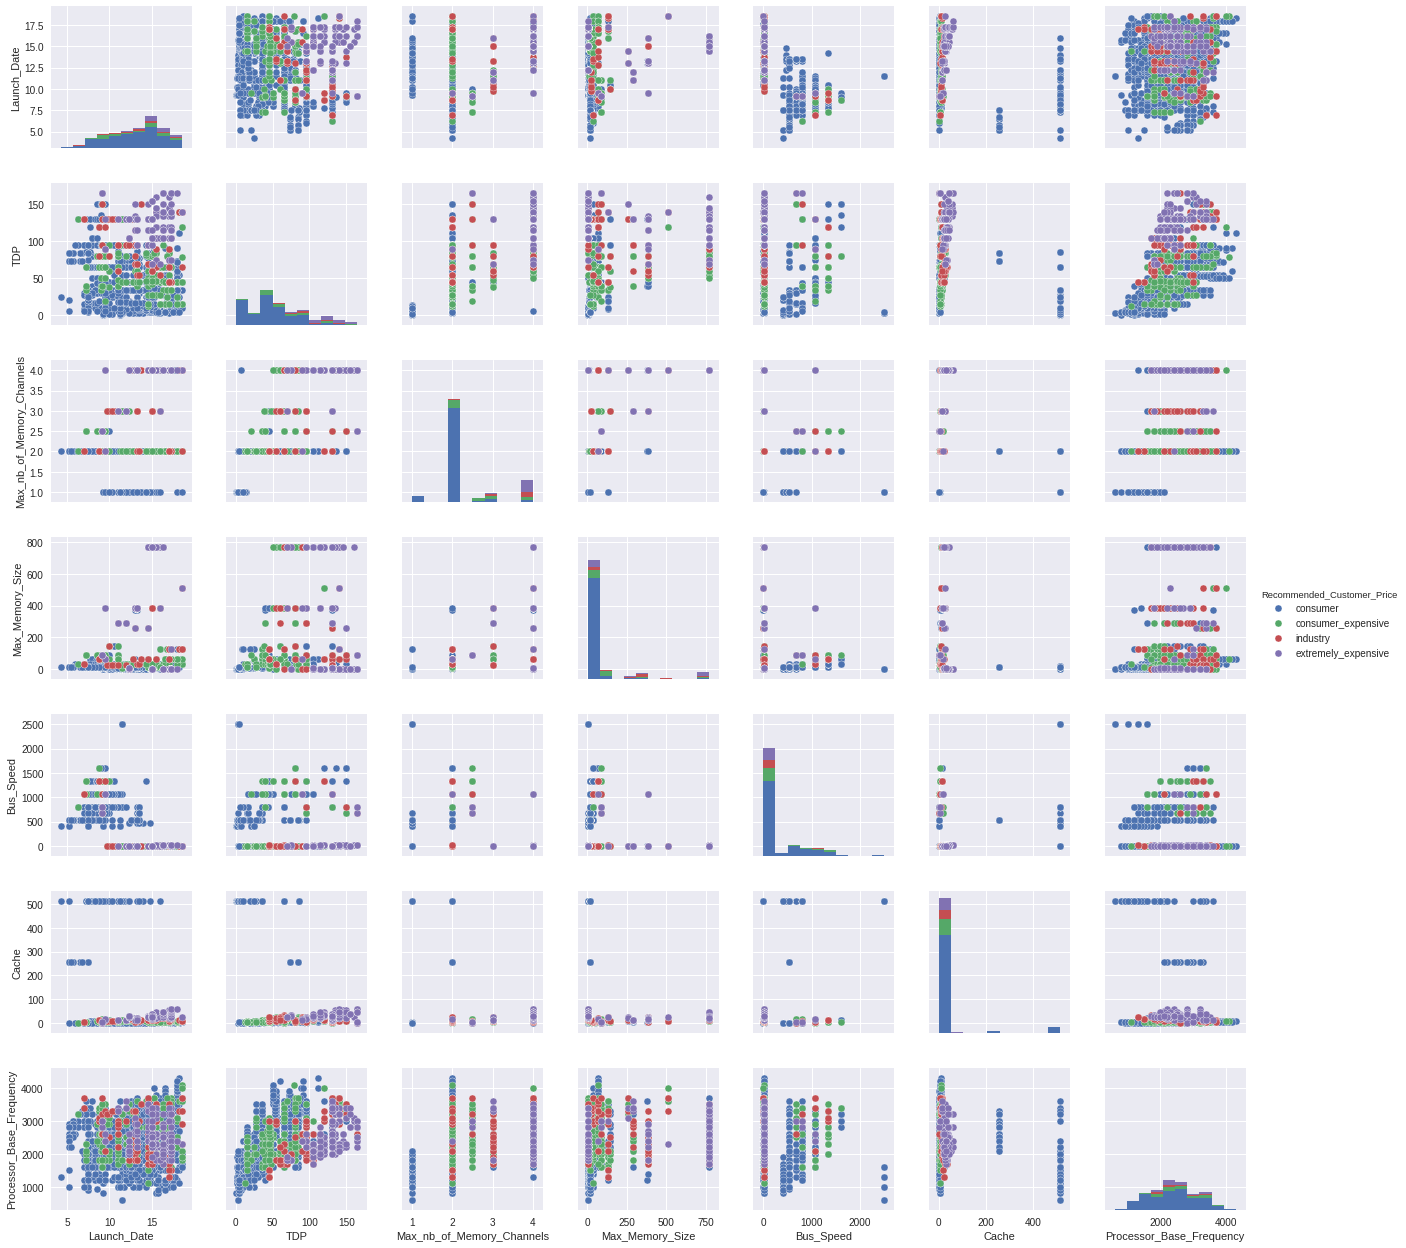

In [186]:
sns.pairplot(data=cpu_clean, vars=num_features, hue='Recommended_Customer_Price')

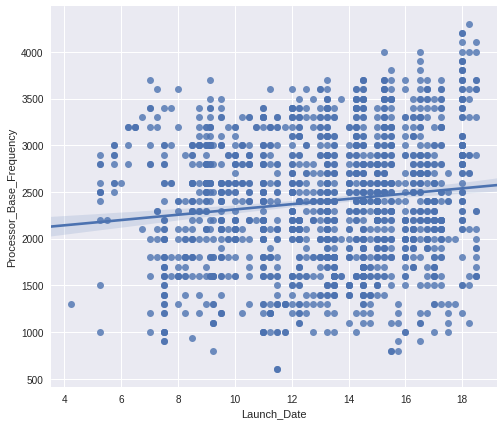

In [208]:
sns.regplot(data=cpu_clean, x='Launch_Date', y='Processor_Base_Frequency')

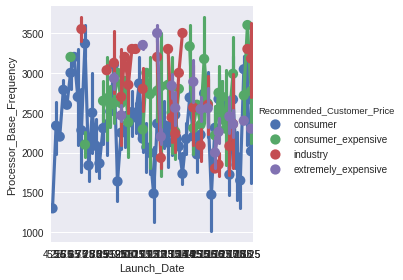

In [201]:
sns.factorplot(data=cpu_clean, x='Launch_Date', y='Processor_Base_Frequency', hue='Recommended_Customer_Price', kind='point')

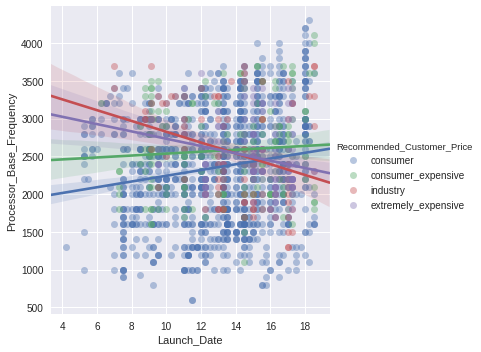

In [213]:
sns.lmplot(data=cpu_clean, x='Launch_Date', y='Processor_Base_Frequency', hue='Recommended_Customer_Price', scatter_kws={'alpha':0.4})

This data is a bit busy, and the lines produced by regression don't appear to be much different from constant. This shouldn't come as too much of a surprise, as the heatmap produced earlier showed a a linear correlation value of $0.13$, not far off from zero.

# t-SNE Time

In [238]:
from sklearn.manifold import TSNE

cpu_num = cpu_clean.loc[:,num_features]

cpu_manifold = TSNE(n_components=3, learning_rate=500).fit_transform(cpu_num)
cpu_manifold.shape

(1623, 3)

In [230]:
import plotly.offline as py

py.init_notebook_mode()

from plotly.graph_objs import Scatter3d, Marker, Layout, XAxis, YAxis, ZAxis

In [241]:
py.iplot( {
    'data': [
        Scatter3d(
            x=cpu_manifold[:,0],
            y=cpu_manifold[:,1],
            z=cpu_manifold[:,2],
            mode='markers',
            marker=Marker(
                size=4,
                color=cpu_clean.Recommended_Customer_Price,
                colorscale='RdBu'
#                 opacity=0.2
            )
        )
    ],
    
    'layout': Layout(
        xaxis = XAxis(),
        yaxis = YAxis(),
        title = 't-SNE Embedded Manifold'
    )
}
)